In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
df=pd.read_csv('/content/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


EDA

In [3]:
df.shape

(400, 11)

In [4]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Axes: xlabel='Sales', ylabel='Count'>

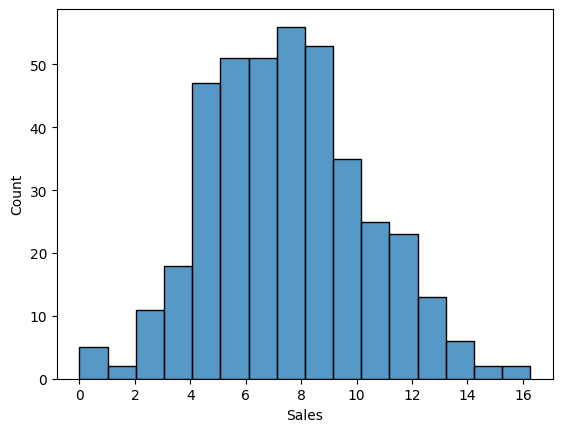

In [8]:
sns.histplot(df['Sales'])

<Figure size 1200x1200 with 0 Axes>

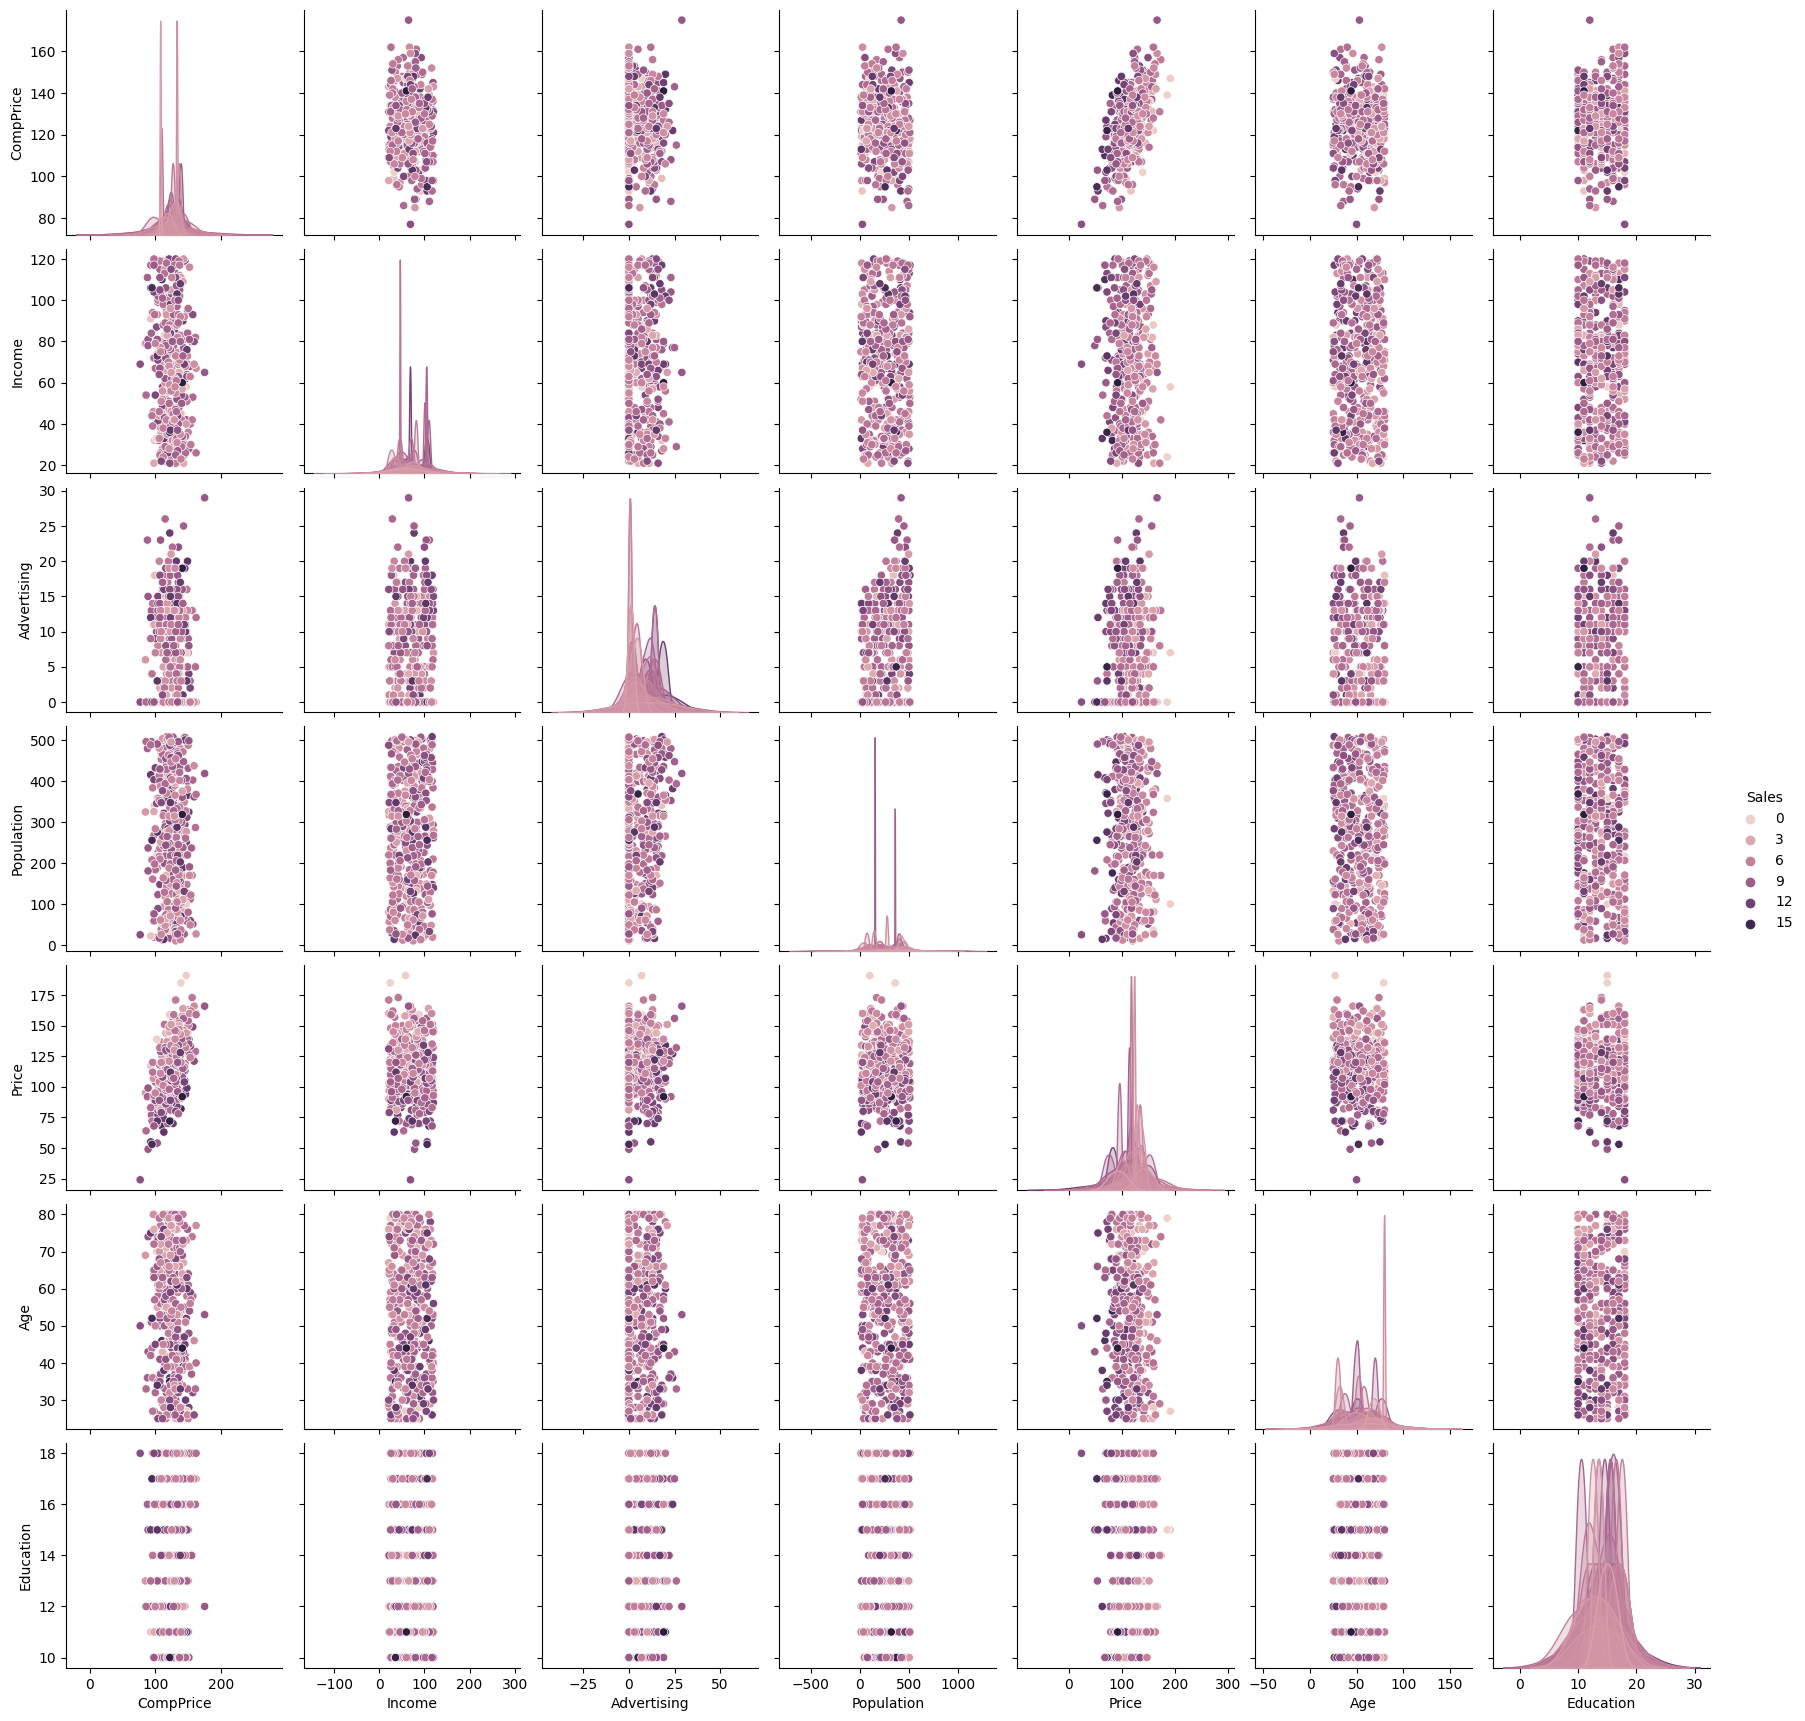

In [9]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df,hue='Sales')

In [10]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [11]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [12]:
# Converting Numerical to Categorical for target variable
sales=[]
for row in df['Sales']:
    if row<8 : sales.append('Bad')
    elif row>=8 : sales.append('Good')

In [14]:
sales

['Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad

In [16]:
df['sales_label']=sales
df.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_label
0,9.50,138,73,11,276,120,Bad,42,17,1,1,Good
1,11.22,111,48,16,260,83,Good,65,10,1,1,Good
2,10.06,113,35,10,269,80,Medium,59,12,1,1,Good
3,7.40,117,100,4,466,97,Medium,55,14,1,1,Bad
4,4.15,141,64,3,340,128,Bad,38,13,1,0,Bad
5,10.81,124,113,13,501,72,Bad,78,16,0,1,Good
6,6.63,115,105,0,45,108,Medium,71,15,1,0,Bad
7,11.85,136,81,15,425,120,Good,67,10,1,1,Good
8,6.54,132,110,0,108,124,Medium,76,10,0,0,Bad
9,4.69,132,113,0,131,124,Medium,76,17,0,1,Bad


In [17]:
df['sales_label'].value_counts()

Bad     236
Good    164
Name: sales_label, dtype: int64

<Axes: >

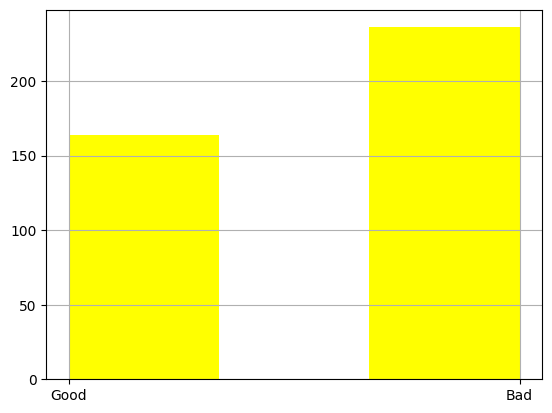

In [18]:
df['sales_label'].hist(bins=3,color='yellow')

In [19]:
df1=df.drop(columns='Sales')
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_label
0,138,73,11,276,120,Bad,42,17,1,1,Good
1,111,48,16,260,83,Good,65,10,1,1,Good
2,113,35,10,269,80,Medium,59,12,1,1,Good
3,117,100,4,466,97,Medium,55,14,1,1,Bad
4,141,64,3,340,128,Bad,38,13,1,0,Bad


Converting Categorical Variables to Numeric Variable

In [20]:
cols=['sales_label','ShelveLoc', 'Urban_Yes','US_Yes']

In [21]:
from sklearn.preprocessing import LabelEncoder
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_label
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [22]:
x=df1.iloc[:,0:10]
y=df1['sales_label']

In [23]:
df1['sales_label'].unique()

array([1, 0])

In [24]:
df1['sales_label'].value_counts()

0    236
1    164
Name: sales_label, dtype: int64

In [25]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'sales_label']

Splitting data into training and testing

In [26]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size= 0.2, random_state=40)

Decision Tree Model Using Entropy Criterion

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

PLotting Tree

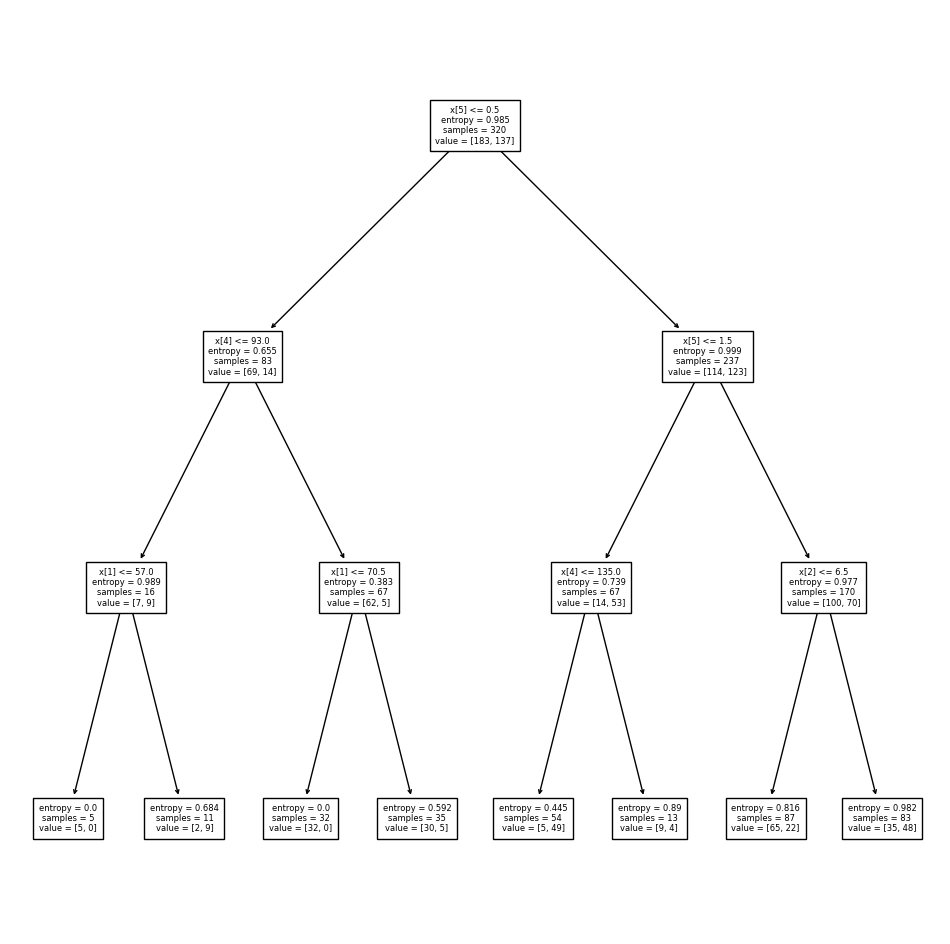

In [29]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

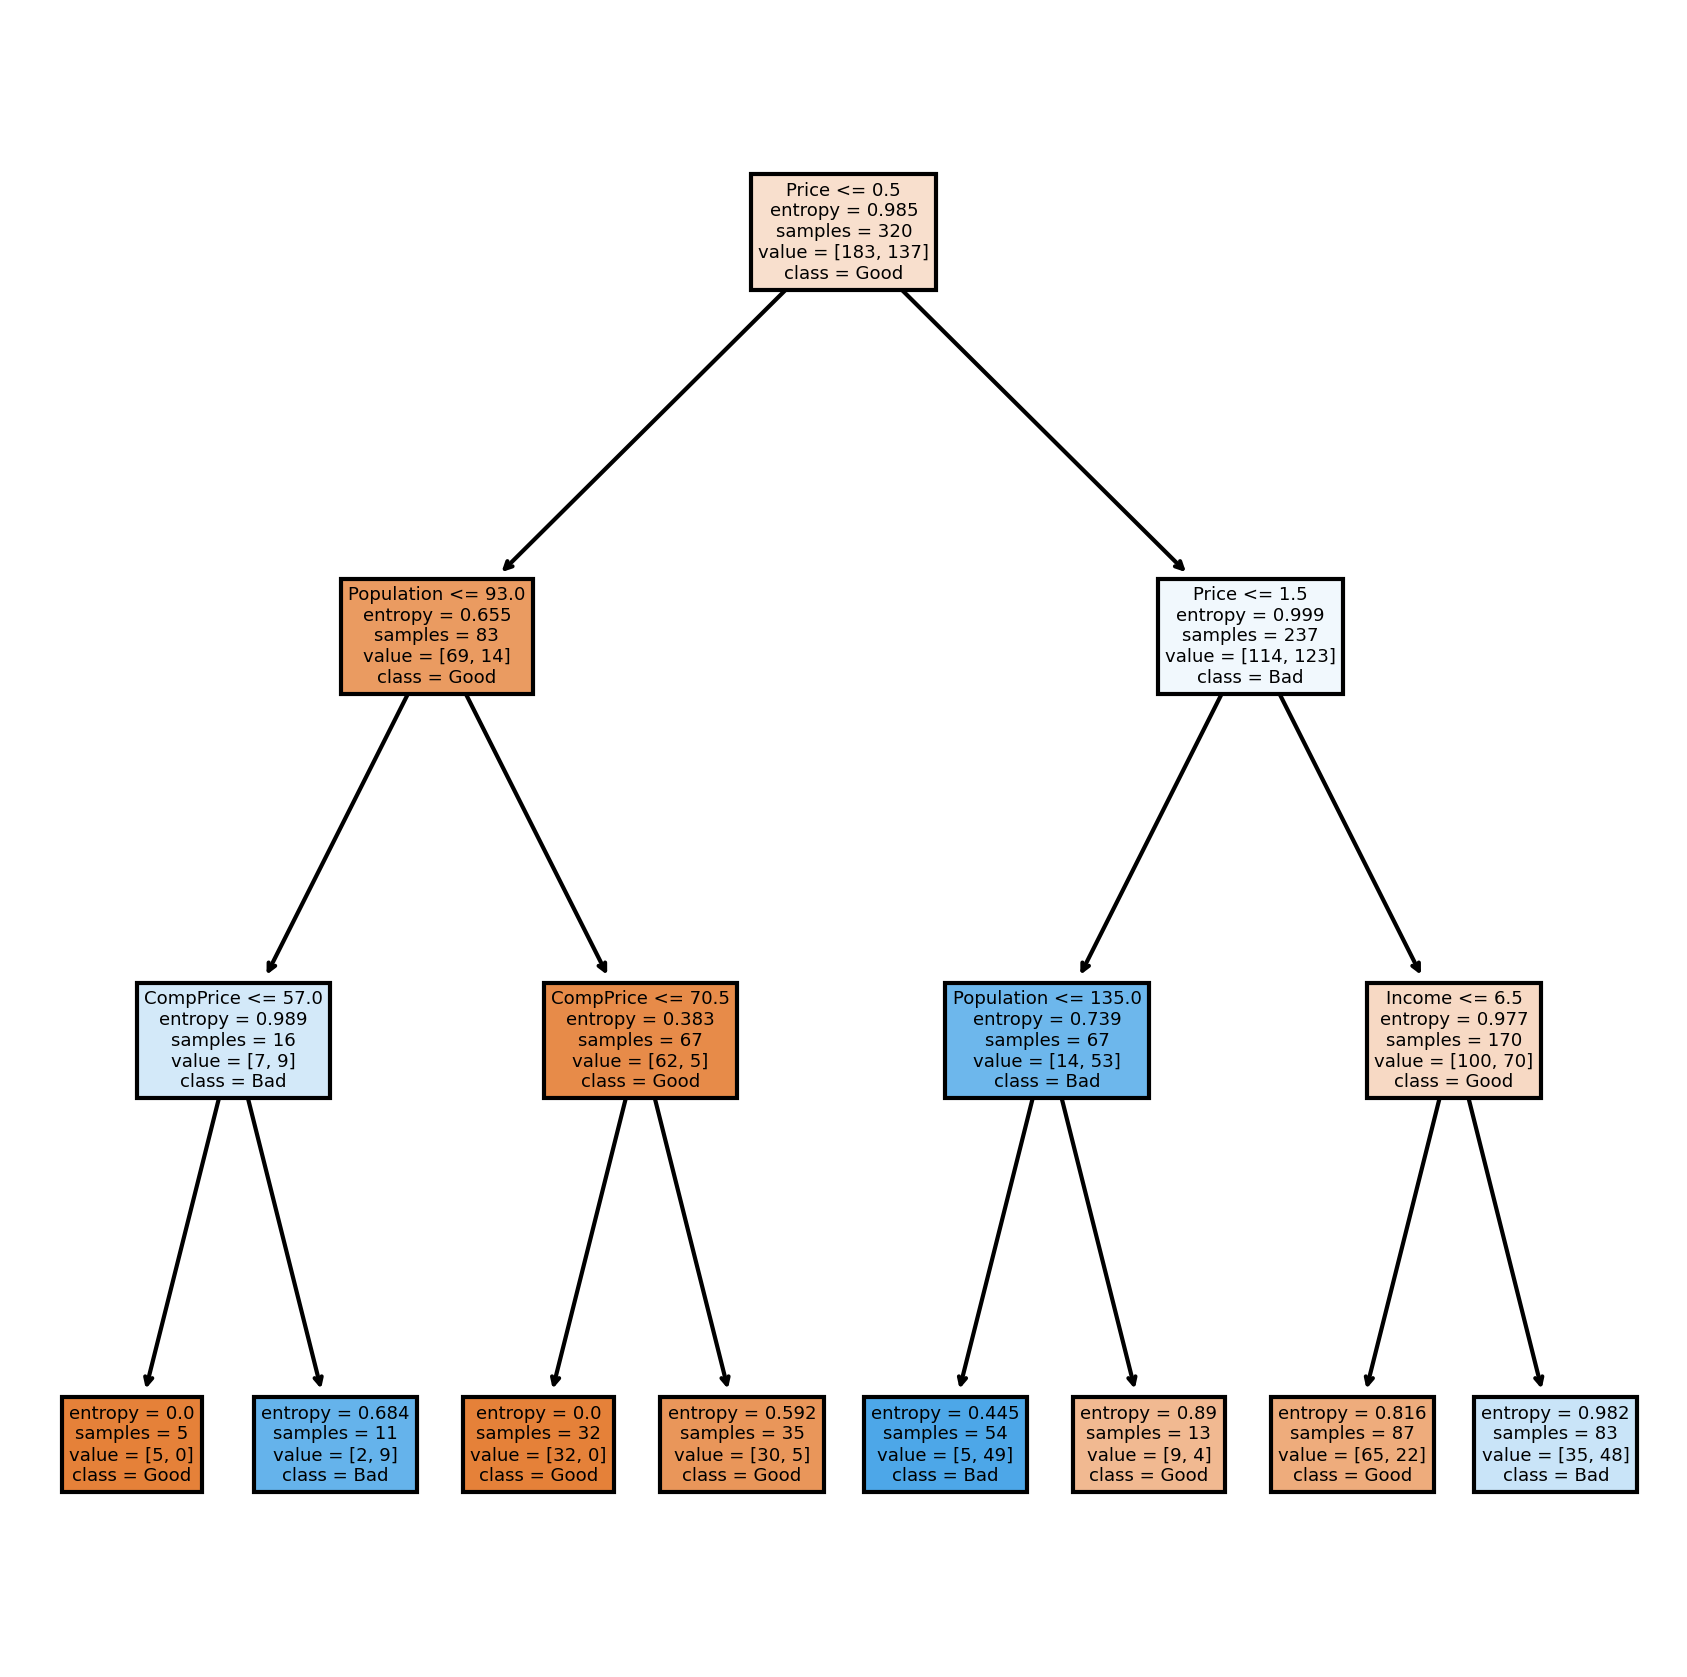

In [32]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [33]:
preds = model.predict(x_test)

In [34]:
preds

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [35]:
pd.Series(preds).value_counts()

0    49
1    31
dtype: int64

In [37]:
pd.crosstab(y_test,preds)

col_0,0,1
sales_label,,
0,39,14
1,10,17


In [38]:
np.mean(preds==y_test)

0.7

Building Decision Tree Classifier (CART) using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [40]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

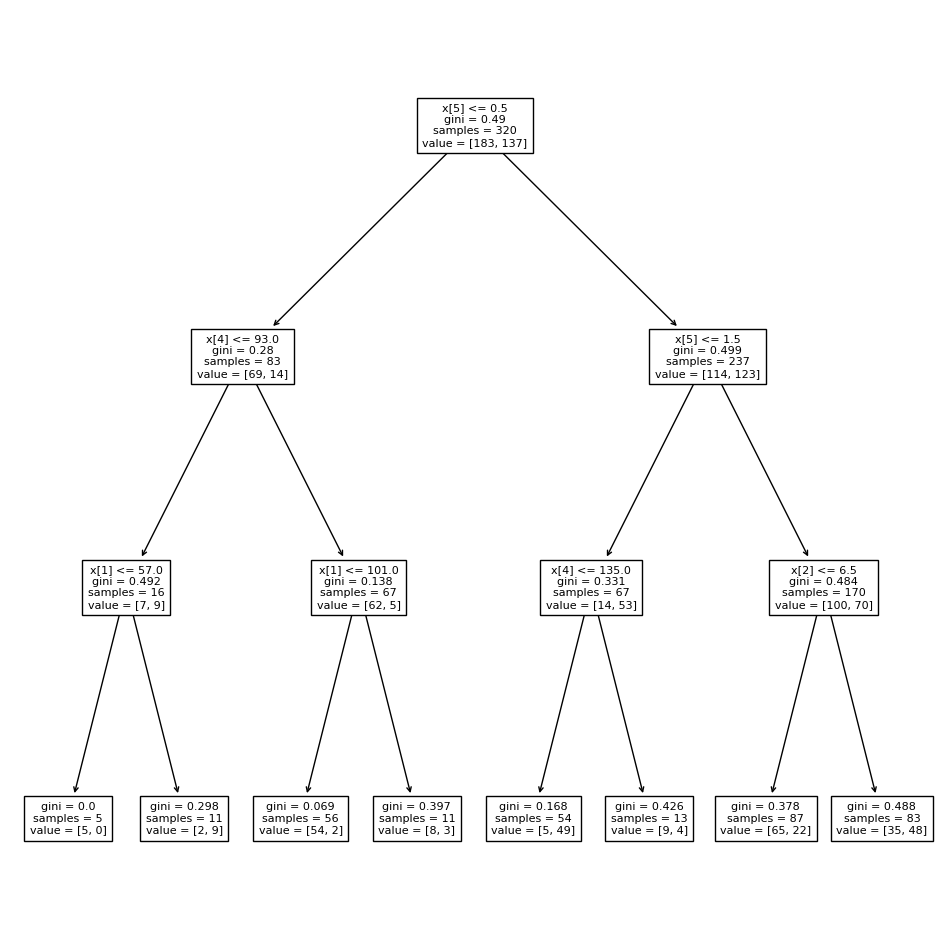

In [42]:
plt.figure(figsize=(12,12))
tree.plot_tree(model_gini, fontsize= 8)
plt.show()

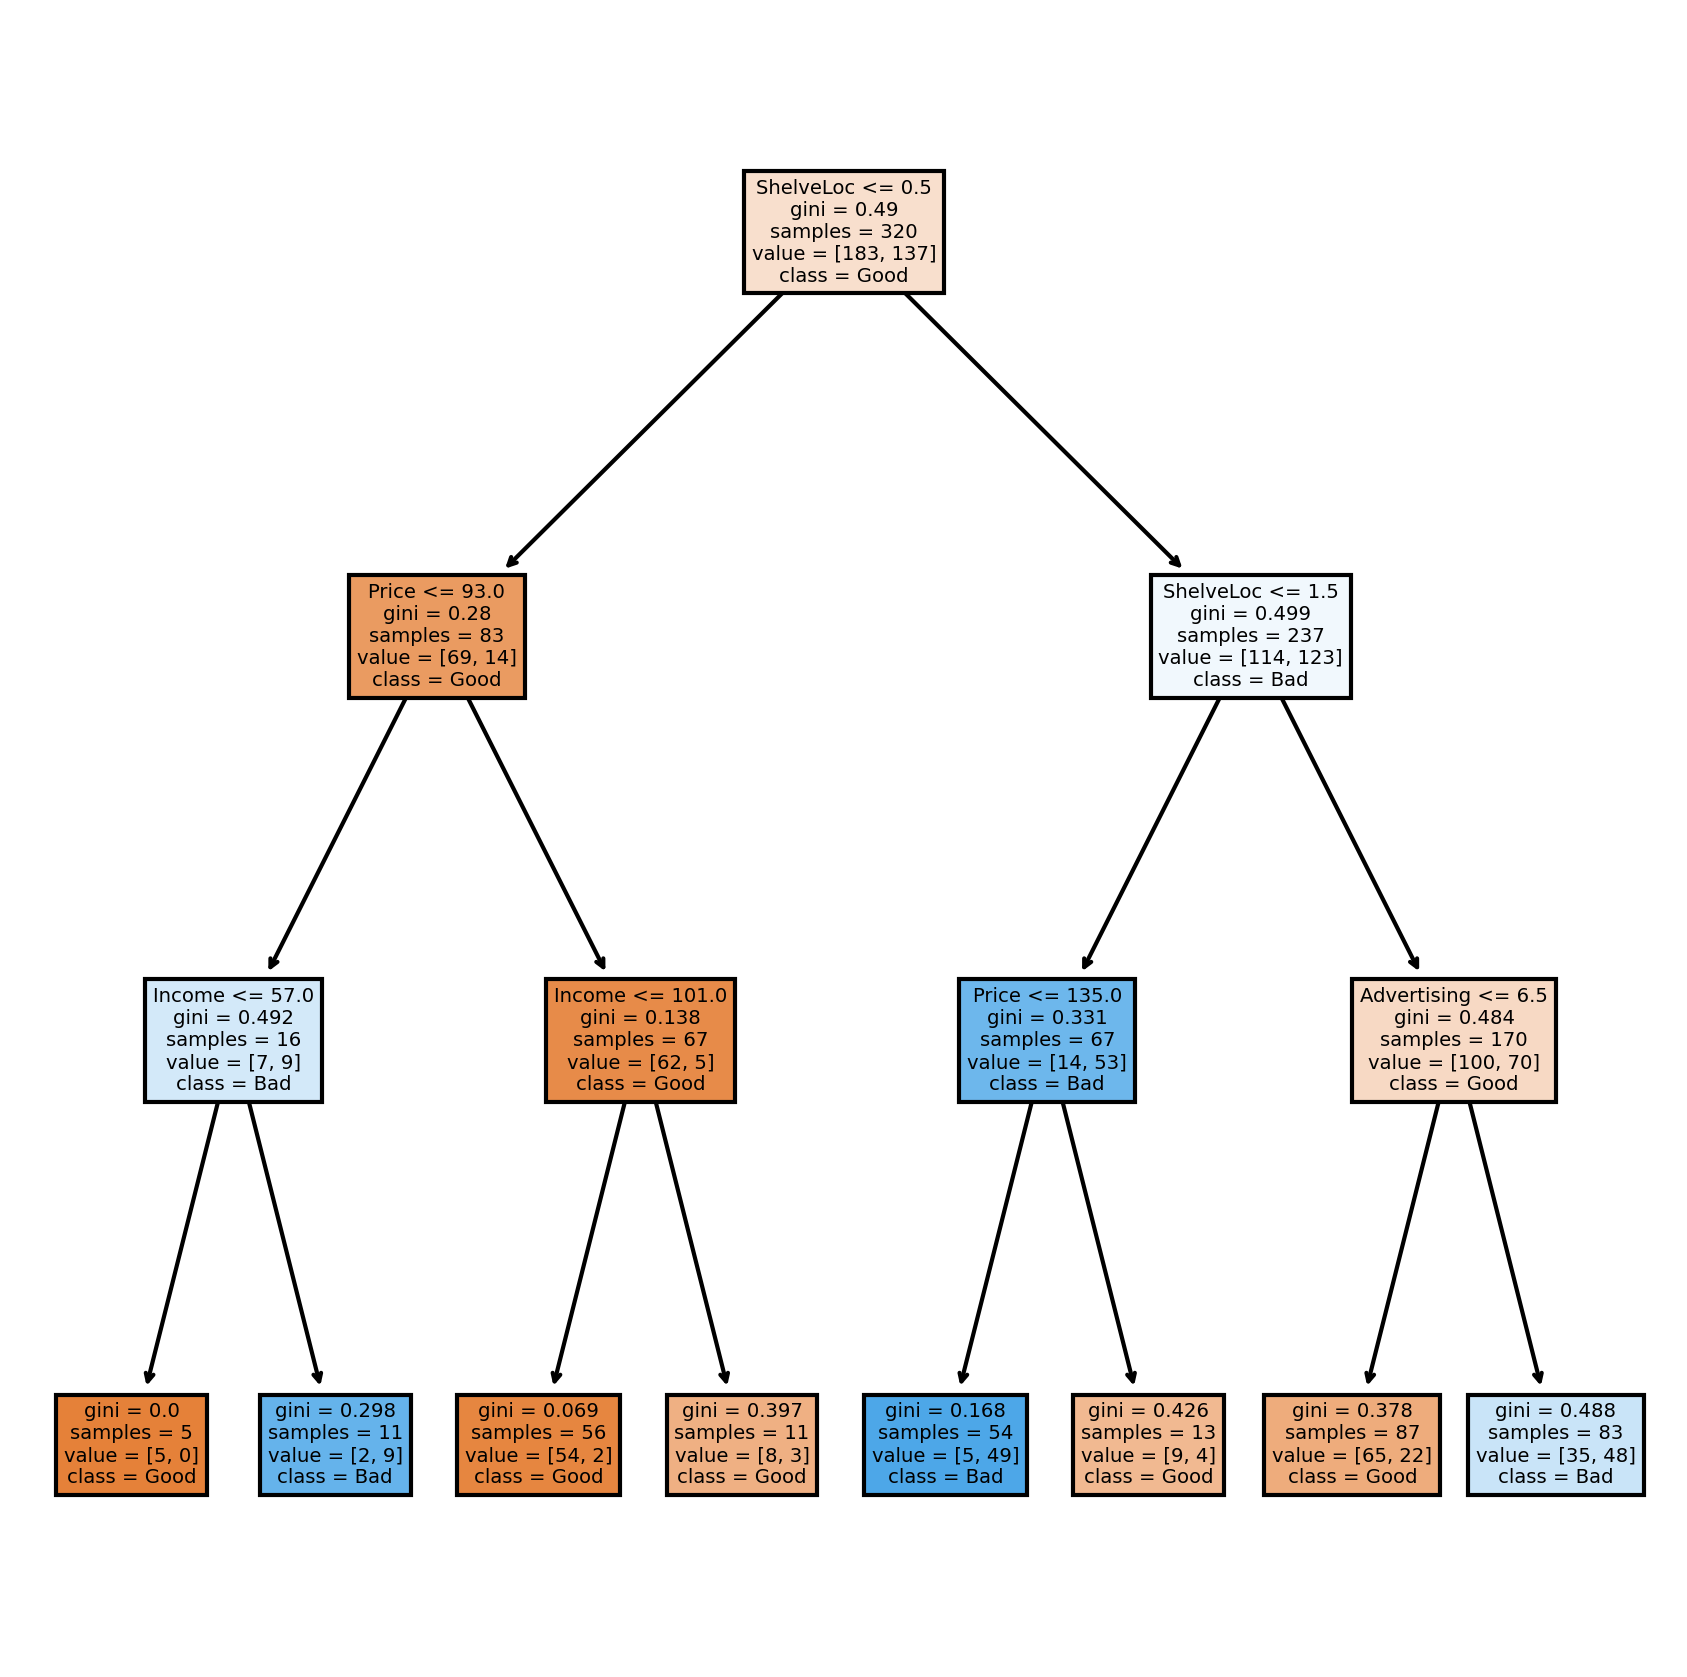

In [44]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [45]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7

Building Tree Model

|--- Price <= 92.50
|   |--- ShelveLoc <= 0.50
|   |   |--- Income <= 58.00
|   |   |   |--- class: 0
|   |   |--- Income >  58.00
|   |   |   |--- class: 1
|   |--- ShelveLoc >  0.50
|   |   |--- Population <= 198.50
|   |   |   |--- class: 1
|   |   |--- Population >  198.50
|   |   |   |--- class: 1
|--- Price >  92.50
|   |--- Advertising <= 6.50
|   |   |--- CompPrice <= 144.50
|   |   |   |--- class: 0
|   |   |--- CompPrice >  144.50
|   |   |   |--- class: 1
|   |--- Advertising >  6.50
|   |   |--- ShelveLoc <= 0.50
|   |   |   |--- class: 0
|   |   |--- ShelveLoc >  0.50
|   |   |   |--- class: 1



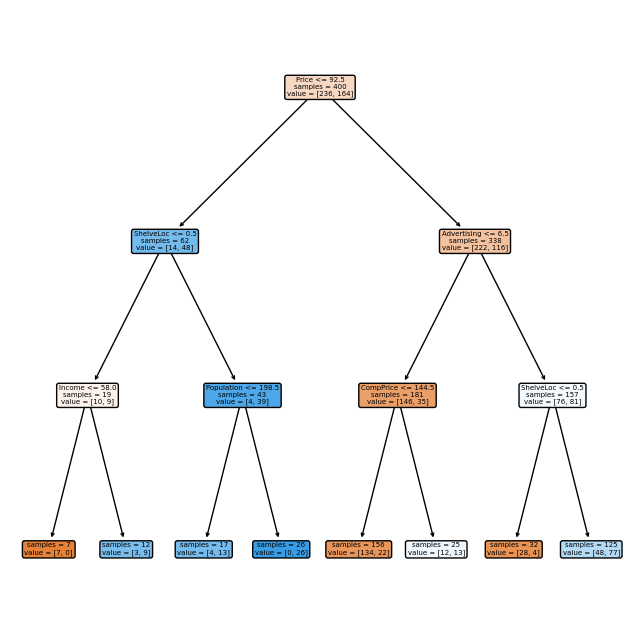

In [46]:
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(x,y)

##Plotting the trees
from sklearn.tree import export_text
plt.figure(figsize=(8,8))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'])
print(export_text(DTree, feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']))

In [47]:
# Tree Model Score
DTree.score(x,y)

0.7675

Tree Validation

In [48]:
predict1 = DTree.predict(x)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
### From confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[169  67]
 [ 26 138]]
0.7675


In [49]:
# Training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8, max_depth=3)
clf.fit(x_train,y_train)

predict1 = clf.predict(x_train)
predict2 = clf.predict(x_test)

# On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

# On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.771875
Test Accuracy 0.7
